In [11]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt

In [12]:
img_size = 64

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    img = img.flatten()
    return img

def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            label = 1 if 'dog' in filename else 0
            img = preprocess_image(os.path.join(folder, filename))
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)
train_folder = '/content/sample_data/test'
X, y = load_images(train_folder)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 78.47%
              precision    recall  f1-score   support

           0       0.05      0.07      0.06        14
           1       0.90      0.86      0.88       130

    accuracy                           0.78       144
   macro avg       0.47      0.47      0.47       144
weighted avg       0.81      0.78      0.80       144



In [17]:
joblib.dump(model, 'svm_model.pkl')

['svm_model.pkl']

In [20]:
model = joblib.load('svm_model.pkl')

def predict_image(image_path, model, scaler):
    img = preprocess_image(image_path)
    img = scaler.transform([img])
    prediction = model.predict(img)
    return 'Dog' if prediction[0] == 1 else 'Cat'

image_path = '/content/sample_data/test/cat.10050.jpg'
print(predict_image(image_path, model, scaler))


Cat


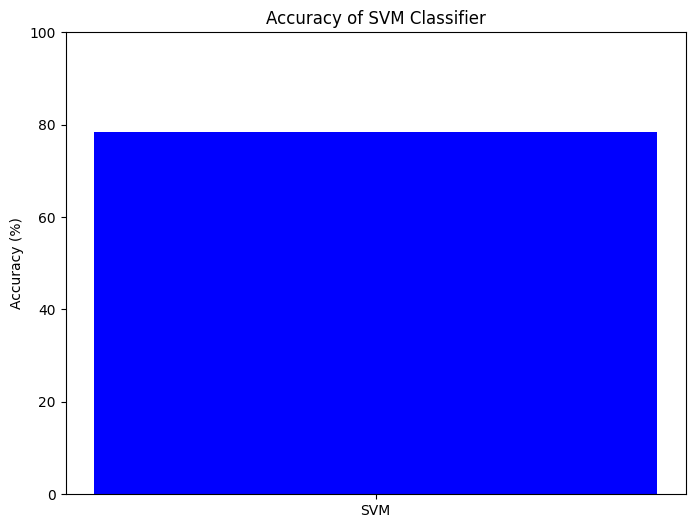

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(['SVM'], [accuracy * 100], color='blue')
plt.title('Accuracy of SVM Classifier')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()